Kanyao Han           
MACSS 30100


# Problem Set  #2


In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

incomes = np.loadtxt('incomes.txt')

## Part I
### a)

Text(0,0.5,'Percent of Income')

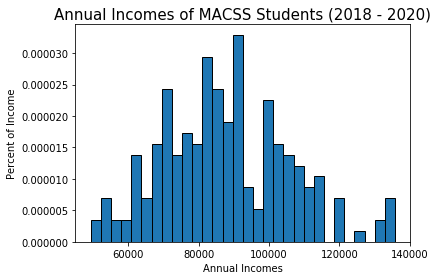

In [2]:
%matplotlib inline
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")

### b)

Text(0,0.5,'Percent of Income')

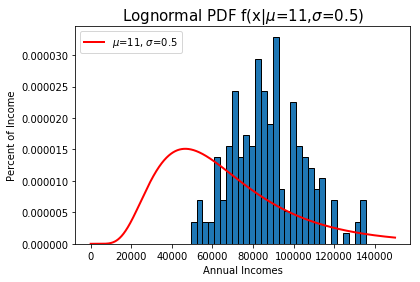

In [3]:
def lognorm_pdf(xvals, mu, sigma, cutoff):
    
    if cutoff == 'None':
        prob_notcut = 1.0 - sts.norm.cdf(0, loc=mu, scale=sigma)
    else:
        prob_notcut = (sts.norm.cdf(cutoff, loc=mu, scale=sigma) -
                       sts.norm.cdf(0, loc=mu, scale=sigma))
            
    pdf_vals = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2))) /
                    prob_notcut)
    
    return pdf_vals


dist_incomes = np.linspace(0, 150000, 150000)

mu_1 = 11
sig_1 = 0.5
cutoff_all = 150000
plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_1, sig_1, cutoff_all),
         linewidth = 2, color='r', label='$\mu$=11, $\sigma$=0.5')
plt.legend(loc='upper left')
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Lognormal PDF f(x|$\mu$=11,$\sigma$=0.5)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")


In [4]:
def log_lik_lognorm(xvals, mu, sigma, cutoff):
    
    pdf_vals = lognorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood', log_lik_lognorm(incomes, mu_1, sig_1, cutoff_all))   

Log-likelihood -2385.856997808558


**The log-likelihood when $\mu$ = 11,$\sigma$ = 0.5 is - 2385.86**

### c)

In [5]:
def crit(params, *args):
    
    mu, sigma = params
    xvals, cutoff = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

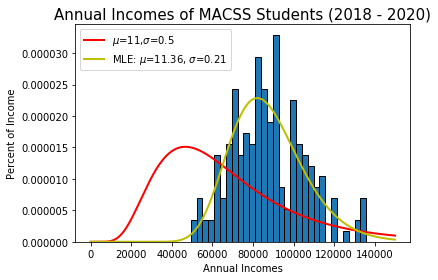

In [6]:
import scipy.optimize as opt

mu_init = 11.2
sig_init = 0.3
params_init = np.array([mu_init, sig_init])
mle_args = (incomes, cutoff_all)
results = opt.minimize(crit, params_init, args=(mle_args), method = 'L-BFGS-B', bounds = ((None, None), (1e-10, None)))
mu_MLE, sig_MLE = results.x


results
OffDiagNeg = np.array([[1, -1], [-1, 1]])
vcv_mle = results.hess_inv.todense() * OffDiagNeg
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])


plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_1, sig_1, cutoff_all),
         linewidth = 2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')
plt.hist(incomes, 30, edgecolor='black', normed=True)
plt.title('Annual Incomes of MACSS Students (2018 - 2020)', fontsize = 15)
plt.xlabel('Annual Incomes')
plt.ylabel("Percent of Income")

plt.plot(dist_incomes, lognorm_pdf(dist_incomes, mu_MLE, sig_MLE, cutoff_all),
         linewidth=2, color='y', label='MLE: $\mu$=11.36, $\sigma$=0.21')
plt.legend(loc='upper left')


In [7]:
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print('Log-likelihood:', log_lik_lognorm(incomes, mu_MLE, sig_MLE, cutoff_all))

mu_MLE= 11.359023036808452  sig_MLE= 0.2081772365462068
Log-likelihood: -2241.719301357398


**The ML estimated $\mu$ is 11.36 and $\sigma$ is 0.21**      
**The value of the likelihood function is -2241.719**

In [8]:
print(vcv_mle, 'is the variance-covariance matrix')

[[2.17378581e-04 1.87316882e-06]
 [1.87316882e-06 1.12913122e-04]] is the variance-covariance matrix


Text(0.5,0,'log likelihood')

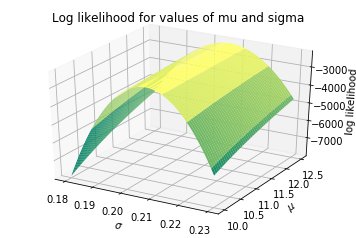

In [9]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

mu_vals = np.linspace(10, 12.5, 50)
sig_vals = np.linspace(0.18, 0.23, 50)
lnlik_vals = np.zeros((50, 50))
for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = log_lik_lognorm(incomes, mu_vals[mu_ind],
                                                        sig_vals[sig_ind], 450)

mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')

### d)

In [10]:
log_lik_h0 = log_lik_lognorm(incomes, mu_1, sig_1, cutoff_all)
log_lik_mle = log_lik_lognorm(incomes, mu_MLE, sig_MLE, cutoff_all)
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0


**The likelihood ratio test result is P = 0 so that we can reject the null hypothesis since the probability is 0, and our estimates compared to the inputs in part(b) are significant.**

### e)

In [11]:
def model(x):
    return 1/(x * sig_MLE * np.sqrt(2 * np.pi)) * np.exp( - (np.log(x) - mu_MLE)**2 / (2 * sig_MLE**2))



inc_1 = (1 - sts.lognorm.cdf(100000, s= sig_MLE, loc= mu_MLE, scale = np.exp(mu_MLE)))
inc_2 = sts.lognorm.cdf(75000, s= sig_MLE, loc= mu_MLE, scale = np.exp(mu_MLE))

print("more than $100,000:", inc_1)
print("less than $75,000:", inc_2)

more than $100,000: 0.23003247536510263
less than $75,000: 0.25999806674802073


** The probability of earning more than 100,000 dollors is 0.23 and earning less than 75,000 dollars is 0.26**

## Part 2
### a)

In [12]:
sick = np.loadtxt('sick.txt', skiprows=1, delimiter=',')

sick_y = sick[:,0]
age = sick[:,1]
children = sick[:,2]
avgtemp_winter = sick[:,3]

In [13]:
def norm_pdf(b0, b1, b2, b3, sigma):
    
    sickpdf_vals = (1/(sigma * np.sqrt(2 * np.pi)) * 
                    np.exp( - (sick_y - b0 - (b1 * age) - (b2 * children) - (b3 * avgtemp_winter))**2 / (2 * sigma**2)))
    
    return sickpdf_vals

def log_lik_err(b0, b1, b2, b3, sigma):
    
    sickpdf_vals = norm_pdf(b0, b1, b2, b3, sigma)
    sickln_pdf_vals = np.log(sickpdf_vals)
    sicklog_lik_val = sickln_pdf_vals.sum()
    
    return sicklog_lik_val
    

def err_crit(params, *args):
    
    b0, b1, b2, b3, sigma = params
    sick_y, age, children, avgtemp_winter = args
    
    sicklog_lik_val = log_lik_err(b0, b1, b2, b3, sigma)
    sickneg_log_lik_val = - sicklog_lik_val
    
    return sickneg_log_lik_val    




b0_init = 0
b1_init = 0
b2_init = 0
b3_init = 0
sicksig_init = 1


sickparams_init = np.array([b0_init, b1_init, b2_init, b3_init, sicksig_init])
sickmle_args = (sick_y, age, children, avgtemp_winter)
sickresults = opt.minimize(err_crit, sickparams_init, args=(sickmle_args),
                      method = "BFGS", bounds = ((None, None), (None, None), (None, None), (None, None), (1e-10, None)))
b0_MLE, b1_MLE, b2_MLE, b3_MLE, sicksig_MLE = sickresults.x

sickOffDiagNeg = np.eye(5)*2 - 1

sickvcv_mle = sickresults.hess_inv * sickOffDiagNeg

print('b0_MLE=', b0_MLE, 'b1_MLE=', b1_MLE, 'b2_MLE=', b2_MLE, 'b3_MLE=', b3_MLE, 'sig_MLE=', sicksig_MLE, 'sig_MLE^2=', sicksig_MLE**2)
print('log likelihood =', log_lik_err(b0_MLE, b1_MLE, b2_MLE, b3_MLE, sicksig_MLE))

b0_MLE= 0.2516467351225803 b1_MLE= 0.012933376803129696 b2_MLE= 0.4005017968289506 b3_MLE= -0.009991694721565676 sig_MLE= 0.003017728900163991 sig_MLE^2= 9.10668771488497e-06
log likelihood = 876.8650464776849


**The ML estimated $\beta_0$ is 0.25, $\beta_1$ is 0.013, $\beta_2$ is 0.4, $\beta_3$ is - 0.00999 and $\sigma^2$ is 0.0000091**      
**The value of likelihood function is 876.865.** 

In [14]:
print(sickvcv_mle.round(10), 'is the variance-covariance matrix')

[[ 9.042e-07 -1.170e-08  2.011e-07  2.280e-08 -3.100e-09]
 [-1.170e-08  3.900e-09  3.410e-08  2.500e-09  0.000e+00]
 [ 2.011e-07  3.410e-08  3.530e-07 -2.260e-08  1.100e-09]
 [ 2.280e-08  2.500e-09 -2.260e-08  2.000e-09  0.000e+00]
 [-3.100e-09  0.000e+00  1.100e-09  0.000e+00  2.310e-08]] is the variance-covariance matrix


**I use BFGS method to compute the matrix.**

In [15]:
sicklog_lik_h0 = log_lik_err(1, 0, 0, 0, 0.1)
sicklog_lik_mle = log_lik_err(b0_MLE, b1_MLE, b2_MLE, b3_MLE, sicksig_MLE)
sickLR_val = 2 * (sicklog_lik_mle - sicklog_lik_h0)
sickpval_h0 = 1.0 - sts.chi2.cdf(sickLR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 5 degrees of freedom p-value =  0.0


**The likelihood ratio test result is P = 0 so that we can reject the null hypothesis that $\beta_0$ = 1, $\sigma^2$ = 0.01 and $\beta_1$, $\beta_2$, $\beta_3$ = 0 since the probability is 0**